In [382]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-rate/Churn_Modelling.csv


# **Import**

In [383]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data import & Structure**

In [384]:
df = pd.read_csv('/kaggle/input/customer-churn-rate/Churn_Modelling.csv')

**Valuables information**
* **RowNumber : Row number i.e. serial number**
* **CustomerId : Id of the customer**
* **Surname : Surname**
* **CreditScore : Credit score of the customer**
* **Geography : Country of respective customer**
* **Age : Age**
* **Tenure : Tenure i.e. from how many years this customer is in the bank**
* **Balance : The balance in that respective customer's account**
* **NumOfProducts**
* **HasCrCard : Has credit card or not?**
* **IsActiveMember**
* **EstimatedSalary**
* **Exited**

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [386]:
df.shape

(10000, 14)

In [387]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Missing Value Check**

In [388]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Duplicated value check**

In [389]:
df.duplicated().sum()

0

In [390]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **2. Data Transform**

In [391]:
df.drop(df.columns[:3], axis=1, inplace=True)

In [392]:
df['Exited'] = df['Exited'].astype(object)

In [393]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **3. Data Visualization**

In [394]:
num_cols = df.select_dtypes(include = ['int64','float64'])
cat_cols = df.select_dtypes(exclude = ['int64','float64'])

**Histogram**

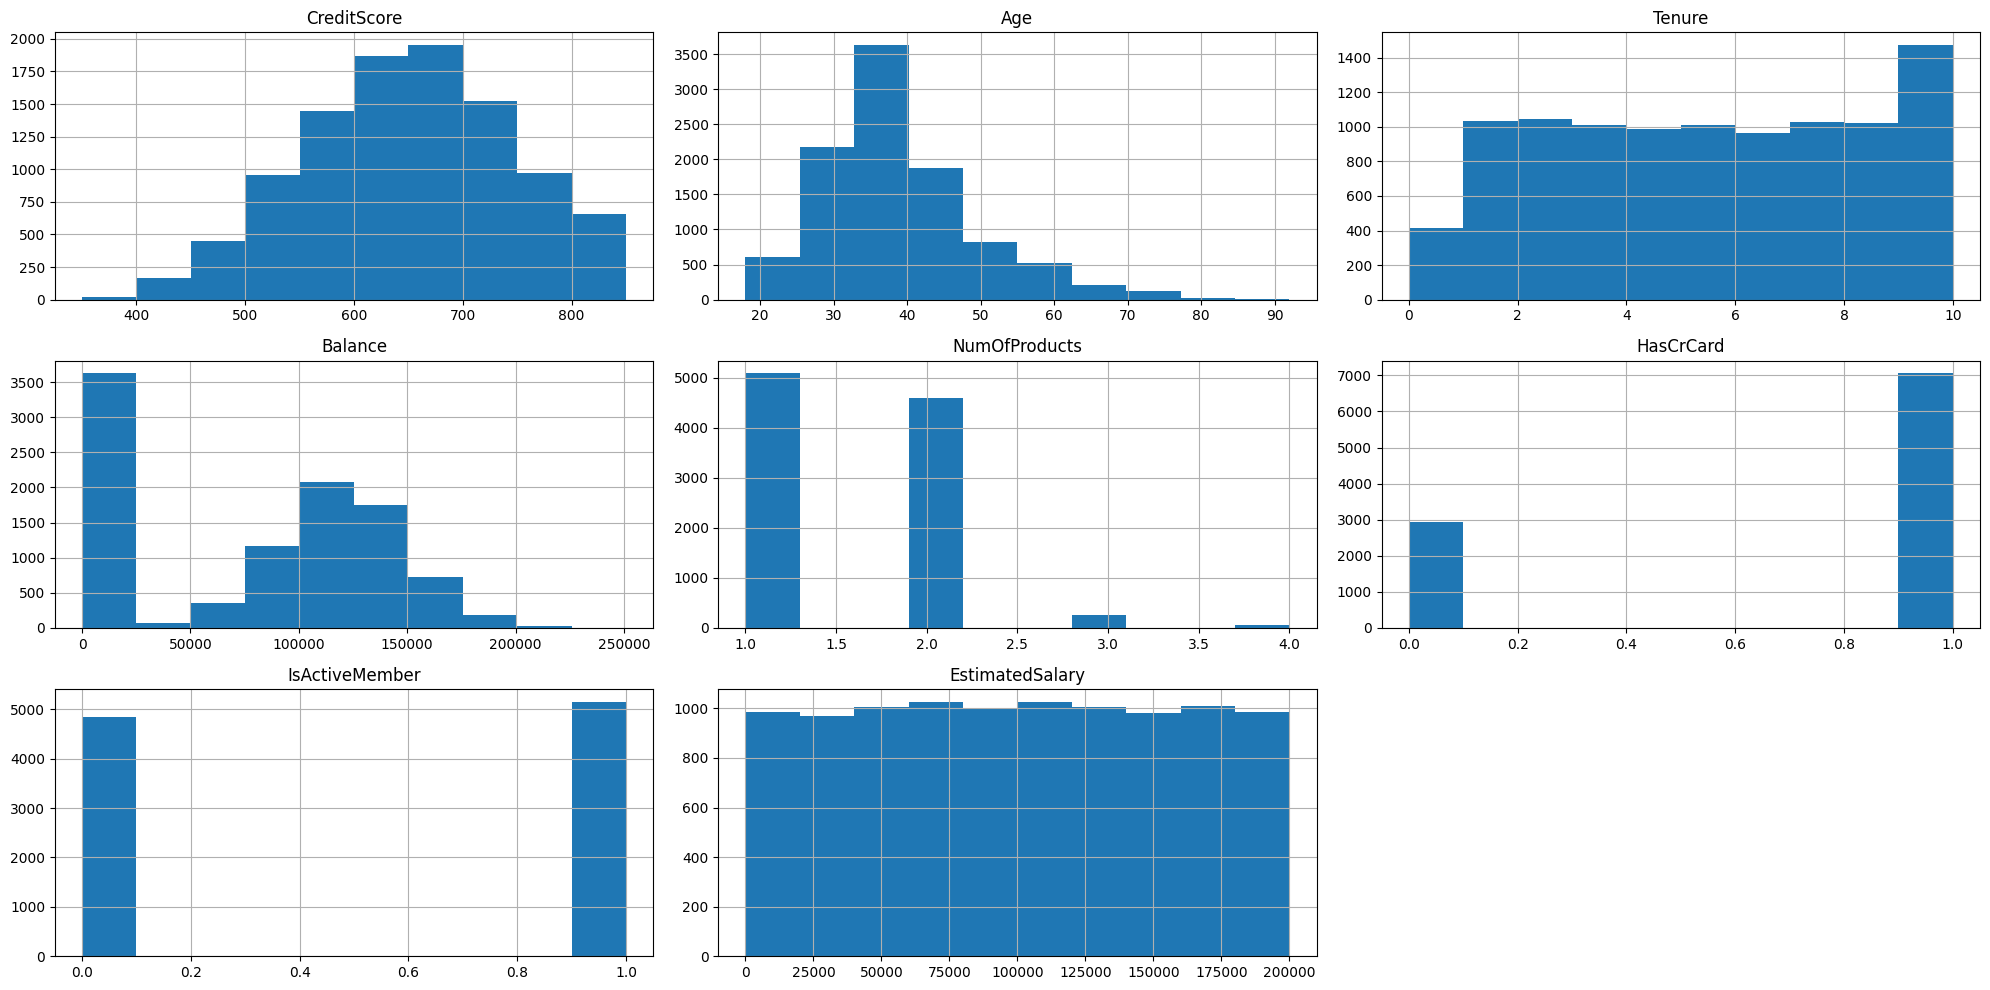

In [395]:
df.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

**Counting of Geography, Gender**

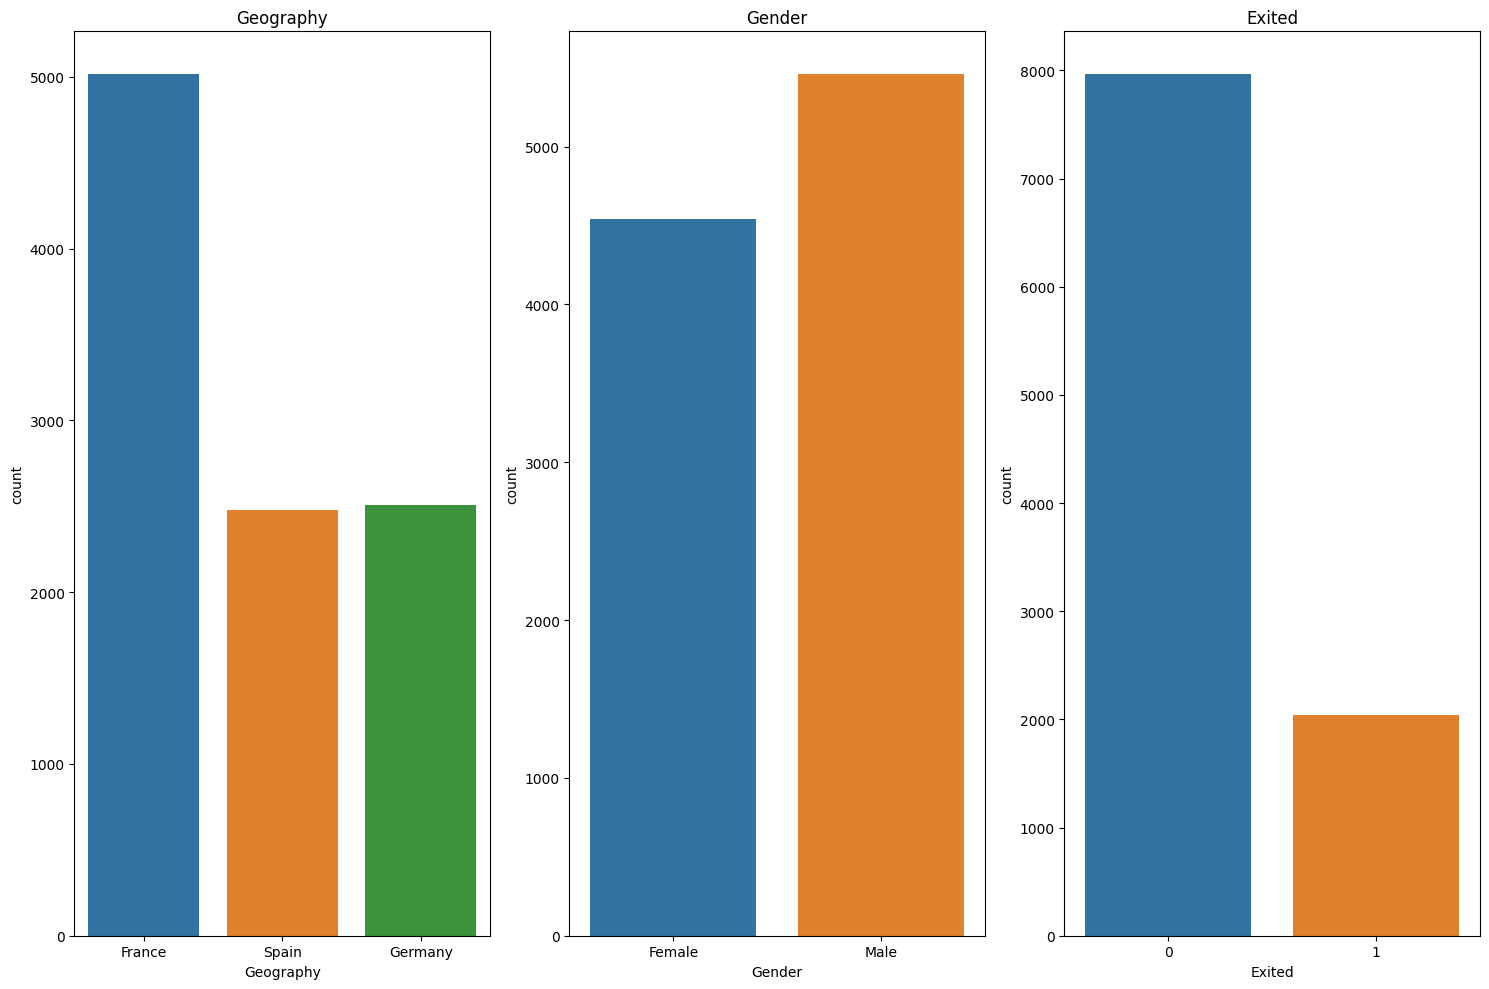

In [396]:
f, ax= plt.subplots(1,3 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data = df, x = cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

-------

**CreditScore ratio by Gender**

In [397]:
gender_by_avgcs = df.groupby(['Gender'])['CreditScore'].mean().reset_index().sort_values(by = 'CreditScore', ascending=False)

In [398]:
gender_by_avgcs

,Gender,CreditScore
0,Female,650.831389
1,Male,650.276892


In [399]:
fig = px.pie(gender_by_avgcs, values = 'CreditScore', names='Gender',title = 'CreditScore ratio by Gender')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

-------

**CreditScore ratio by Geography**

In [400]:
Geography_by_avgcs = df.groupby(['Geography'])['CreditScore'].mean().reset_index().sort_values(by = 'CreditScore', ascending=False)

In [401]:
Geography_by_avgcs

,Geography,CreditScore
1,Germany,651.453567
2,Spain,651.333872
0,France,649.668329


In [402]:
fig = px.pie(Geography_by_avgcs, values = 'CreditScore', names='Geography',title = 'CreditScore ratio by Geography')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

----------

**CreditScore ratio by Exited**

In [403]:
Exited_by_avgcs = df.groupby(['Exited'])['CreditScore'].mean().reset_index().sort_values(by = 'CreditScore', ascending=False)

In [404]:
Exited_by_avgcs['Exited']= Exited_by_avgcs['Exited'].map({0:'False', 1:'True'})

In [405]:
Exited_by_avgcs

,Exited,CreditScore
0,False,651.853196
1,True,645.351497


In [406]:
fig = px.pie(Exited_by_avgcs, values = 'CreditScore', names = 'Exited',title = 'CreditScore ratio by Exited')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

------

**Average Balance by Geography**

In [407]:
Geography_by_avgbl = df.groupby(['Geography'])['Balance'].mean().reset_index().sort_values(by = 'Balance', ascending=False)

In [408]:
Geography_by_avgbl

,Geography,Balance
1,Germany,119730.116134
0,France,62092.636516
2,Spain,61818.147763


In [409]:
px.bar(Geography_by_avgbl, x= 'Geography' , y='Balance' ,text_auto = True, title = 'Average Balance by Geography')

------

**Average Balance by Exited**

In [410]:
Exited_by_avgbl = df.groupby(['Exited'])['Balance'].mean().reset_index().sort_values(by = 'Balance', ascending=False)

In [411]:
Exited_by_avgbl['Exited']= Exited_by_avgbl['Exited'].map({0:'False', 1:'True'})

In [412]:
Exited_by_avgbl

,Exited,Balance
1,True,91108.539337
0,False,72745.296779


In [413]:
px.bar(Exited_by_avgbl, x= 'Exited' , y='Balance' ,text_auto = True, title = 'Average Balance by Exited')

-----------

**Exited by Tenure**

In [414]:
Exited_Tenure = df.groupby(['Exited','Tenure']).size().reset_index(name='count')

In [415]:
Exited_Tenure['Exited']= Exited_Tenure['Exited'].map({0:'False', 1:'True'})

In [416]:
Exited_Tenure

,Exited,Tenure,count
0,False,0,318
1,False,1,803
2,False,2,847
3,False,3,796
4,False,4,786
5,False,5,803
6,False,6,771
7,False,7,851
8,False,8,828
9,False,9,771


In [417]:
px.bar(Exited_Tenure, x= 'Tenure' , y='count', color = 'Exited',barmode='group' ,text_auto = True, title = 'Exited by Tenure')

---------

**Change in Average Balance by Tenure**

In [418]:
Tenure_by_avgbl = df.groupby(['Tenure'])['Balance'].mean().reset_index().sort_values(by = 'Tenure', ascending=True)

In [419]:
Tenure_by_avgbl

,Tenure,Balance
0,0,79878.910630
1,1,78555.384222
2,2,76839.626469
3,3,77668.059881
4,4,74059.394065
5,5,76444.280860
6,6,74403.942637
7,7,75551.634426
8,8,77936.598254
9,9,76562.544014


In [420]:
px.line(Tenure_by_avgbl, x= 'Tenure',y = 'Balance',markers=True, title = 'Change in Average Balance by Tenure')

--------

**Average EstimateSalary by Exited**

In [421]:
Exited_by_avges = df.groupby(['Exited'])['EstimatedSalary'].mean().reset_index().sort_values(by = 'EstimatedSalary', ascending=False)

In [422]:
Exited_by_avges['Exited']= Exited_by_avges['Exited'].map({0:'False', 1:'True'})

In [423]:
Exited_by_avges

,Exited,EstimatedSalary
1,True,101465.677531
0,False,99738.391772


In [424]:
px.bar(Exited_by_avges, x= 'Exited' , y='EstimatedSalary', text_auto = True, title = 'Average EstimateSalary by Exited')

-----------

**Change in Average EstimatedSalary by Tenure**

In [425]:
Tenure_by_avges = df.groupby(['Exited', 'Tenure'])['EstimatedSalary'].mean().reset_index().sort_values(by = 'Tenure', ascending=True)

In [426]:
Tenure_by_avges['Exited']= Tenure_by_avges['Exited'].map({0:'False', 1:'True'})

In [427]:
Tenure_by_avges

,Exited,Tenure,EstimatedSalary
0,False,0,105655.802642
11,True,0,91391.115158
1,False,1,100685.891532
12,True,1,99716.593621
2,False,2,96610.271913
13,True,2,105484.839900
3,False,3,98338.159937
14,True,3,95159.745258
4,False,4,100579.429084
15,True,4,97112.320246


In [428]:
px.line(Tenure_by_avges, x= 'Tenure',y = 'EstimatedSalary',color = 'Exited',markers=True, title = 'Change in Average EstimatedSalary by Tenure')

--------

**Correlation**

In [429]:
num_cols = num_cols.columns

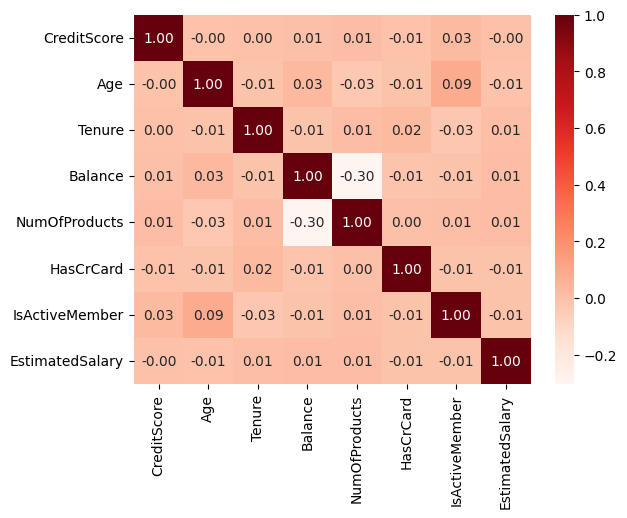

In [430]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

In [431]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# **4. Modeling**

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [433]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [434]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [435]:
x= df.drop(['Exited'],axis=1)
y= df['Exited']

In [436]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [438]:
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, svc, abc, gbc, lgr, xgb]

names = ["Random Forest", "Support Vector Machine", "Ada Boost",
        "Gradient Boostng", "Logistic Regression", "XGBoost"]

In [466]:
index = 0

for name, model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    print("-"*50)
    index += 1


Random Forest accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

--------------------------------------------------
Support Vector Machine accuracy: 0.8575
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000

--------------------------------------------------
Ada Boost accuracy: 0.853
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.48      

# **5. Evaluation**

**GradientBoosting is best model because of  high accuracy.**
